# Spam or Ham (Working Title)
Lab Assignment Two: Exploring Text Data

**_Jake Oien, Seung Ki Lee, Jenn Le_**

## Business Understanding

In [2]:
import pandas as pd
import numpy as np

# Here, we'll import the data, remove unwanted columns(cause this data has 3 empty columns for some reason,
# and rename the columns to be more descriptive
data = pd.read_csv("./spam.csv", encoding='latin-1')
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"label", "v2":"text"})

data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


We should add a column which stores the length of a text, which will be useful later. 

In [3]:
length = lambda x: len(x)
data["text_length"] = data["text"].map(length)  # add a column indicating how long a message is

## Data Encoding

In [4]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

First a graph of what the data looks like. We group the data by spam label and length of message

In [5]:
data.drop_duplicates(inplace=True)

data_grouped = data.groupby(by=["label"])
data_grouped.describe()

text_length                                                         
            count        mean        std   min    25%    50%    75%    max
label                                                                     
ham        4516.0   70.459256  56.358207   2.0   34.0   52.0   90.0  910.0
spam        653.0  137.891271  30.137753  13.0  132.0  149.0  157.0  224.0

## Data Visualization

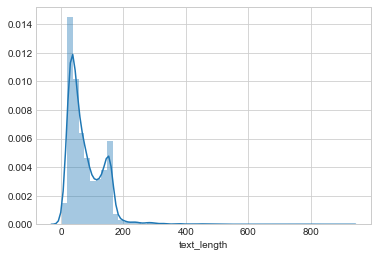

In [6]:
import seaborn as sns
sns.set_style("whitegrid")
cmap = sns.diverging_palette(0, 10, as_cmap=True) # one of the many color mappings

sns.distplot(data.text_length)

In [7]:
cutoff = 225
num_entries_in_tail = data[data.text_length > cutoff].count()["text_length"]
print("Num entries longer than {} characters long: {}".format(cutoff, num_entries_in_tail))
print("Number of texts in dataset: {}".format(len(data)))
print("Percentage of total data being trimmed from the top end: {}%".format(round(num_entries_in_tail/len(data)*100, 3)))

Num entries longer than 225 characters long: 78
Number of texts in dataset: 5169
Percentage of total data being trimmed from the top end: 1.509%


We see that 78 of the messages are longer than 225 characters. In order to get a better picture of the bulk of the data, we trim those from data when graphing.

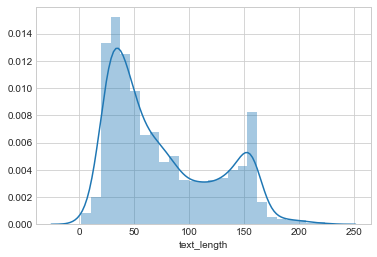

In [8]:
data_trimmed = data[data.text_length <= 225]
sns.distplot(data_trimmed.text_length)

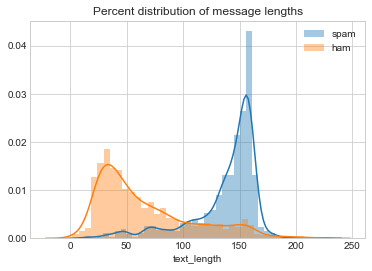

In [ ]:
fig, ax = plt.subplots()

sns.distplot(data_trimmed[data_trimmed.label == "spam"].text_length, label="spam", ax=ax, bins=40)
sns.distplot(data_trimmed[data_trimmed.label == "ham"].text_length, label="ham", ax=ax, bins=40)

plt.title("Percent distribution of message lengths")
plt.legend();

We can see that there appears to be a noticable difference in the length of spam messages vs. ham messages. The ham distribution is skewed towards shorter messages while the spam distribution is skewed towards longer messages. 

We also see that there is a sharp drop off of messages after the 160-character mark, with spam messages taking a nose dive. This could be explained by SMS's character limit. After 160 characters, a message must be split into multiple parts. So, both "hammers" and "spammers" might try to avoid hitting that limit which might explain the drop. 

In [ ]:
# do this to stop pandas from yelling at us about acting on a copy
pd.options.mode.chained_assignment = None  # default='warn'  

data_trimmed["all"] = data_trimmed.text.map(lambda x: 1)

sns.factorplot(x="all",y='text_length',hue='label',data=data_trimmed, 
               kind='violin', # other options: violin, bar, box, and others 
               palette='Set2', size=7,ci=95, split=True)
plt.title("Violin Plot of message length of ham vs spam messages");

# adapted from "03. DataVisualization.ipynb" in "Simplifying with Seaborn" by Eric Larson

In [ ]:
## TODO: 
## Look at the vocabulary size of spam messages vs non spam messages
## Graph tfidf values of the most relevant words